In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
import requests

from sklearn.covariance import empirical_covariance

import pickle
import joblib

In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [3]:
data = pd.read_csv('clean_train.csv').drop('Unnamed: 0', axis=1)

C:\Users\ZukiPC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,...,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station,Year,Month,Hour,Day_of_week,Week
0,47b07238-a9b6-4ef7-a209-7a1fd8c88149,Vehicle search,2019-12-03 00:00:00+00:00,NaN,54.548325,-1.271298,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,...,Controlled drugs,Caution (simple or conditional),False,NaN,cleveland,2019,12,0,Tuesday,49
1,be1ce6a4-89b7-49a2-bc2a-00868a115c42,Vehicle search,2019-12-04 12:12:00+00:00,False,51.382699,0.543110,Male,10-17,Asian/Asian British - Indian,Asian,...,Psychoactive substances,Arrest,True,False,kent,2019,12,12,Wednesday,49
2,2f44c551-7fe3-475f-8ed6-ae3e24928505,Vehicle search,2018-09-25 00:41:00+00:00,False,53.608913,-2.138118,Male,18-24,Asian/Asian British - Pakistani,Asian,...,Controlled drugs,A no further action disposal,False,False,greater-manchester,2018,9,0,Tuesday,39
3,564e42e2-16e5-4fdc-a140-1e4406d8941e,Vehicle search,2018-09-07 19:00:00+00:00,True,51.190980,0.269950,Male,18-24,Other ethnic group - Not stated,Other,...,Controlled drugs,Summons / charged by post,False,NaN,kent,2018,9,19,Friday,36
4,4fdcc05d-44c0-477a-a9c7-55c15efb319c,Vehicle search,2018-09-07 19:21:00+00:00,True,51.190980,0.269950,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,...,Controlled drugs,Summons / charged by post,False,NaN,kent,2018,9,19,Friday,36


In [5]:
data['Officer-defined ethnicity'].value_counts()

White    243929
Black     32521
Asian     24789
Other      5977
Mixed      1828
Name: Officer-defined ethnicity, dtype: int64

In [6]:
data['target']= (
    np.where(
    data['Outcome linked to object of search']==True,
    1,
    0)
)

In [7]:
columns_to_drop = ['observation_id', 'Part of a policing operation', 
       'Latitude', 'Longitude', 
       'Self-defined ethnicity', 'Legislation',
       'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing', 'Year','Month', 'Hour', 'Day_of_week', 'Week', 'target']

In [8]:
X = data.drop(columns=columns_to_drop)
y = data['target']

In [9]:
categorical_features = ['Type', 'Gender', 'Age range', 'Officer-defined ethnicity',
       'Object of search', 'station']

In [14]:
train, test = train_test_split(data[categorical_features + ['target']], test_size=0.25, random_state=42, stratify = data[['Officer-defined ethnicity', 'target']])

In [17]:
X_train = train[categorical_features]
y_train = train['target']
X_test = test[categorical_features]
y_test = test['target']

train = X_train.join(y_train)

train = (
    train
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Black'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Asian'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Other'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
    .append(train[train['Officer-defined ethnicity']=='Mixed'])
)

X_train = train[categorical_features]
y_train = train['target']

In [18]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_jobs=-1, random_state=42, max_depth = 10, min_samples_split= 500, n_estimators=7, max_leaf_nodes=5),
)

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Gender',
                                                   'Age range',
                                                   'Officer-defined ethnicity',
                                                   'Object of search',
                                                   'station'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_leaf_nodes=5,
                                        min_samples_split=500, n_estimators=7,
                                        n_jobs=-1, random_state=42))])

In [20]:
preds = pipeline.predict(X_test)

In [21]:
len(preds)

77261

In [22]:
def verify_success_rate_above(y_true, y_pred, min_success_rate=0.5):
    """
    Verifies the success rate on a test set is above a provided minimum
    
    
    """
    
    precision = precision_score(y_true, y_pred, pos_label=True)
    is_satisfied = (precision >= min_success_rate)
    
    return is_satisfied, precision


In [23]:
def verify_amount_found(y_true, y_pred):
    """
    Verifies the amout of contraband found in the test dataset - a.k.a the recall in our test set
    """
    
    recall = recall_score(y_true, y_pred)    
    return recall

In [24]:
verify_success_rate_above(y_test, preds)

(True, 0.8483193277310924)

In [25]:
verify_amount_found(y_test, preds)

0.08058915099988026

Feature ranking:
1. feature station_btp (0.318191)
2. feature station_west-yorkshire (0.198021)
3. feature station_merseyside (0.103115)
4. feature station_thames-valley (0.081022)
5. feature station_west-mercia (0.068344)
6. feature Object of search_Controlled drugs (0.062421)


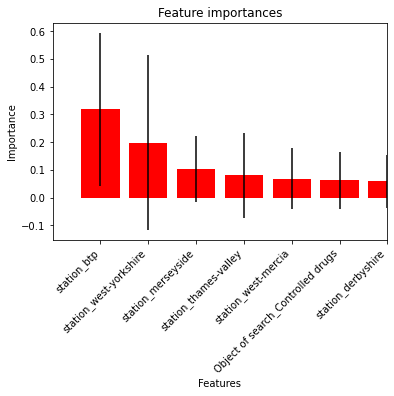

In [26]:
numerical_features = []
categorical_encode_step = pipeline.named_steps['columntransformer'].named_transformers_['cat'].named_steps['onehot']
random_forest_step = pipeline.named_steps['randomforestclassifier']

onehot_columns = categorical_encode_step.get_feature_names(input_features=categorical_features)

importances = pd.Series(data=random_forest_step.feature_importances_, index = np.array(numerical_features + list(onehot_columns)))

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, importances.index[indices[f]], importances[indices[f]]))

std = np.std([tree.feature_importances_ for tree in random_forest_step.estimators_], axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(x=importances.index[indices], height=importances[indices],
        color="r", yerr=std[indices], align="center");
plt.xticks(range(len(importances.index[indices])), importances.index[indices], rotation=45, ha="right")
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features');
plt.ylabel('Importance');

plt.show()

In [27]:
roc_auc = roc_auc_score(y_test, preds)

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [29]:
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [30]:
confmat = confusion_matrix(y_test, preds)

In [31]:
def make_confmat_pretty(confmat):
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title('Confusion Matrix')
    plt.show()

In [32]:
accuracy_score(y_test, preds)

0.6971952213924231

In [33]:
def verify_no_discrimination(X_test, y_true, y_pred, sensitive_column='Officer-defined ethnicity', max_diff=0.10, min_samples=500):
    """
    Verifies that no subdeparment has discrimination in between protected races
    
    
    """
    
    departments = X_test['station'].unique()
    sensitive_classes = X_test[sensitive_column].unique()
    
    is_satisfied = True
    problematic_departments = []
    good_deparments = []
    for department in departments:
        precisions = {}
        for sensitive_class in sensitive_classes:
            mask = (X_test[sensitive_column] == sensitive_class) & (X_test['station'] == department)
            if mask.sum():
                precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)
                
        if len(precisions) > 1:    
            diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))

            if diff > max_diff:
                is_satisfied = False
                problematic_departments.append((department, diff, precisions))
            else:
                good_deparments.append((department, diff, precisions))
        else:
            ignored_departments.append((department, None, []))
    
    global_precisions = {}
    for sensitive_class in sensitive_classes:
        mask = (X_test[sensitive_column] == sensitive_class)
        if np.sum(mask) > min_samples:
            global_precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)
    
    if len(precisions) > 1:    
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff > max_diff:
            is_satisfied = False
        
    return is_satisfied, problematic_departments, good_deparments, global_precisions

In [34]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, preds)

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

C:\Users\ZukiPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requirement satisfied! 🚀
avg diff: nan


C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, preds, sensitive_column='Gender')

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

C:\Users\ZukiPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requirement satisfied! 🚀
avg diff: nan


C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
proba = pipeline.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, proba[:, 1])

In [54]:
print(len(precision), len(recall), len(thresholds))

48 48 47


In [55]:
precision = precision[:-1]
recall = recall[:-1]

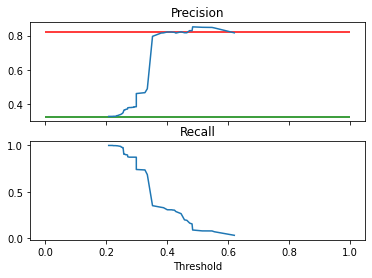

In [56]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.hlines(y=0.82,xmin=0, xmax=1, colors='red')
ax1.hlines(y=0.3263483,xmin=0, xmax=1, colors='green')
ax1.plot(thresholds,precision)
ax2.plot(thresholds,recall)
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
ax1.set_title('Precision')
ax2.set_title('Recall')
plt.xlabel('Threshold')
plt.show()

In [58]:
min_index = [i for i, prec in enumerate(precision) if prec >= 0.84][0]
print(min_index)

42


In [59]:
precision[min_index]

0.8509036144578314

In [60]:
recall[min_index]

0.09020875743423941

In [61]:
thresholds[min_index]

0.48373922769529026

In [62]:
best_preds = [1 if prob > thresholds[min_index] else 0 for prob in proba[:, 1]]

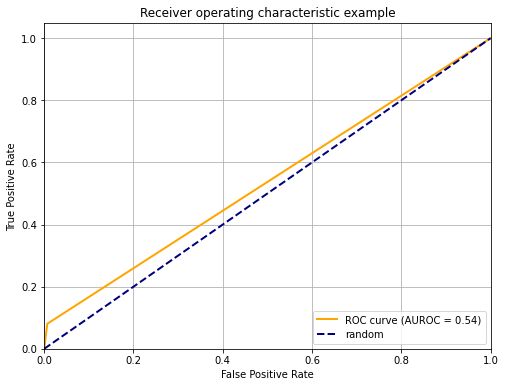

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, best_preds)
plot_roc_curve(roc_auc=roc_auc, fpr=fpr, tpr=tpr)

In [64]:
len(best_preds)

77261

In [65]:
np.array(best_preds).sum()

2380

In [66]:
verify_success_rate_above(y_test, best_preds)

(True, 0.8483193277310924)

In [67]:
verify_amount_found(y_test, best_preds)

0.08058915099988026

In [68]:
accuracy_score(y_test, best_preds)

0.6971952213924231

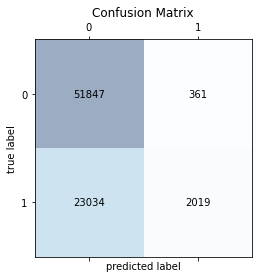

In [69]:
confmat = confusion_matrix(y_test, best_preds)  
make_confmat_pretty(confmat=confmat)

In [70]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, np.array(best_preds))

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

C:\Users\ZukiPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requirement satisfied! 🚀
avg diff: nan


C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [71]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, np.array(best_preds), sensitive_column='Gender')

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

C:\Users\ZukiPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requirement satisfied! 🚀
avg diff: nan


C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ZukiPC\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Try non Tree model

In [503]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=10, tol=0.1),
)

In [504]:
pipeline.fit(X_train, y_train)

C:\Users\ZukiPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Gender',
                                                   'Age range',
                                                   'Officer-defined ethnicity',
                                                   'Object of search',
                                                   'station'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=10, tol=0.1))])

In [ ]:
preds2 = pipeline.predict(X_test)

In [ ]:
verify_success_rate_above(y_test, preds2)

In [ ]:
verify_amount_found(y_test, preds2)

In [ ]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, preds2)

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

In [ ]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, preds2, sensitive_column='Gender')

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

In [ ]:
is_satisfied, problematic_departments, good_deparments, global_precisions  = verify_no_discrimination(
    X_test, y_test, preds2, sensitive_column='Age range')

if not is_satisfied:
    print("Requirement failed 😢")
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_deparments)))
else:
    print("Requirement satisfied! 🚀")

print("avg diff:", np.mean([p[1] for p in problematic_departments]))

In [ ]:
# data['aux'] = [tuple(data[['station', 'Officer-defined ethnicity', 'Gender']].iloc[i].values) for i in range(data.shape[0])]
# data.to_csv('train_with_norelevant.csv')

In [ ]:
category_map = {
    "Type": ["Person search", "Person and Vehicle search", "Vehicle search"],
    "Part of a policing operation": [True, False],
    "Gender": ["Male", "Female"],
    "Age range": ["10-17", "18-24", "25-34", "over 34"],
    "Officer-defined ethnicity": ["Asian", "White", "Black", "Other", "Mixed"],
    "Legislation": ['Misuse of Drugs Act 1971 (section 23)', 
                    'Police and Criminal Evidence Act 1984 (section 1)', 
                    'Psychoactive Substances Act 2016 (s36(2))', 
                    'Criminal Justice Act 1988 (section 139B)',
                    'Firearms Act 1968 (section 47)',
                    'Poaching Prevention Act 1862 (section 2)',
                    'Criminal Justice and Public Order Act 1994 (section 60)',
                    'Police and Criminal Evidence Act 1984 (section 6)', 
                    'Wildlife and Countryside Act 1981 (section 19)', 
                    'Psychoactive Substances Act 2016 (s37(2))', 
                    'Aviation Security Act 1982 (section 27(1))', 
                    'Protection of Badgers Act 1992 (section 11)',
                    'Crossbows Act 1987 (section 4)',  
                    'Public Stores Act 1875 (section 6)',
                    'Customs and Excise Management Act 1979 (section 163)',
                    'Deer Act 1991 (section 12)',
                    'Conservation of Seals Act 1970 (section 4)'],
    "station": ['avon-and-somerset',
                 'bedfordshire',
                 'btp',
                 'cambridgeshire',
                 'cheshire',
                 'city-of-london',
                 'cleveland',
                 'cumbria',
                 'derbyshire',
                 'devon-and-cornwall',
                 'dorset',
                 'durham',
                 'dyfed-powys',
                 'essex',
                 'gloucestershire',
                 'greater-manchester',
                 'gwent',
                 'hampshire',
                 'hertfordshire',
                 'humberside',
                 'kent',
                 'lancashire',
                 'leicestershire',
                 'lincolnshire',
                 'merseyside',
                 'metropolitan',
                 'norfolk',
                 'north-wales',
                 'north-yorkshire',
                 'northamptonshire',
                 'northumbria',
                 'nottinghamshire',
                 'south-yorkshire',
                 'staffordshire',
                 'suffolk',
                 'surrey',
                 'sussex',
                 'thames-valley',
                 'warwickshire',
                 'west-mercia',
                 'west-yorkshire',
                 'wiltshire']
}

with open('columns.json', 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)
    
with open('dtypes.pickle', 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)
    
joblib.dump(pipeline, 'pipeline.pickle');

In [61]:
# Test should_search/ API
payload = {
        "observation_id":"test3",
        "Type":"Person search",
        "Date":'2019-12-01 00:00:00+00:00',
        "Part of a policing operation":True,
        "Latitude":23,
        "Longitude":34,
        "Gender":'Male',
        "Age range":"18-24",
        "Officer-defined ethnicity":"Asian",
        "Legislation":'Misuse of Drugs Act 1971 (section 23)',
        "Object of search":'Controlled drugs?',
        "station":'lancashire'
    }

#url = f"http://localhost:5000/should_search"
url = f"https://capstonecarlosfonseca.herokuapp.com/should_search"
r = requests.post(url, json=payload)
r.json()

{'outcome': False}

In [62]:
# Test search_result/ API
payload = {"observation_id":"test3", "outcome":True}

# url = f"http://localhost:5000/search_result"
url = f"https://capstonecarlosfonseca.herokuapp.com/search_result"
r = requests.post(url, json=payload)
r.json()

{'observation_id': 'test3', 'outcome': True, 'predicted_outcome': False}

In [ ]:
# http://localhost:5000/search_result